# **Predict Employee Attrition: Transform**

## Objectives

* At the end of this phase, we will:
    - Transform the dataset to analyze it in more detail
    - Conduct statistical tests to determine and establish relationships between features
    - Create a dashaboard that enables better exploration

## Inputs

* [Task outline](https://docs.google.com/document/d/e/2PACX-1vThNllbMORJoc348kFavz4mZWT1-33xyazdD2L-3AlTfORlRhuDyT0xmCBQMD2C-K2djQQipt6te6lo/pub)
* Extract phase

## Outputs

* Transform the dataset
* Statitical tests and visualizations
* PowerBI Dashboard

---

# Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin as pg

---

# Data reupload

In [41]:
df = pd.read_csv("../data/cleaned_data/predict_employee_attrition_copy.csv")
print(df.shape)
df.head()

(1470, 32)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

---

# Data transformation

Aggregating satisfaction levels

In [42]:
# Create TotalSatisfaction feature by averaging satisfaction scores
satisfaction_cols = ["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]
df["TotalSatisfaction"] = df[satisfaction_cols].mean(axis=1)
print(df[["TotalSatisfaction"] + satisfaction_cols].head())

   TotalSatisfaction  JobSatisfaction  EnvironmentSatisfaction  \
0               2.00                4                        2   
1               3.00                2                        3   
2               3.00                3                        4   
3               3.25                3                        4   
4               2.50                2                        1   

   RelationshipSatisfaction  WorkLifeBalance  
0                         1                1  
1                         4                3  
2                         2                3  
3                         3                3  
4                         4                3  


Creating age groups

In [43]:
print(df["Age"].nunique())
print("---" * 40)
print(df["Age"].unique())
print("---" * 40)
print(f"Min age: ", df["Age"].min())
print("---" * 40)
print(f"Max age: ", df["Age"].max())

43
------------------------------------------------------------------------------------------------------------------------
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
------------------------------------------------------------------------------------------------------------------------
Min age:  18
------------------------------------------------------------------------------------------------------------------------
Max age:  60


In [44]:
# Define age brackets
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create AgeBracket column
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the distribution of age brackets
print(df['AgeBracket'].value_counts())
print(df[['Age', 'AgeBracket']].head())

AgeBracket
26-35    606
36-45    468
46-55    226
18-25    123
56-65     47
Name: count, dtype: int64
   Age AgeBracket
0   41      36-45
1   49      46-55
2   37      36-45
3   33      26-35
4   27      26-35


encoding attrition and gender

In [45]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [46]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

## Sanity check: Post-transformation

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   int64   
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [48]:
(df == 0).sum()

Age                            0
Attrition                   1233
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                       588
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked           197
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StockOptionLevel             631
TotalWorkingYears             11
TrainingTimesLastYear         54
WorkLifeBalance                0
YearsAtCompany                44
YearsInCurrentRole           244
YearsSince

In [49]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
TotalSatisfaction           0
AgeBracket

---

# Correlation analysis: Post-transformation

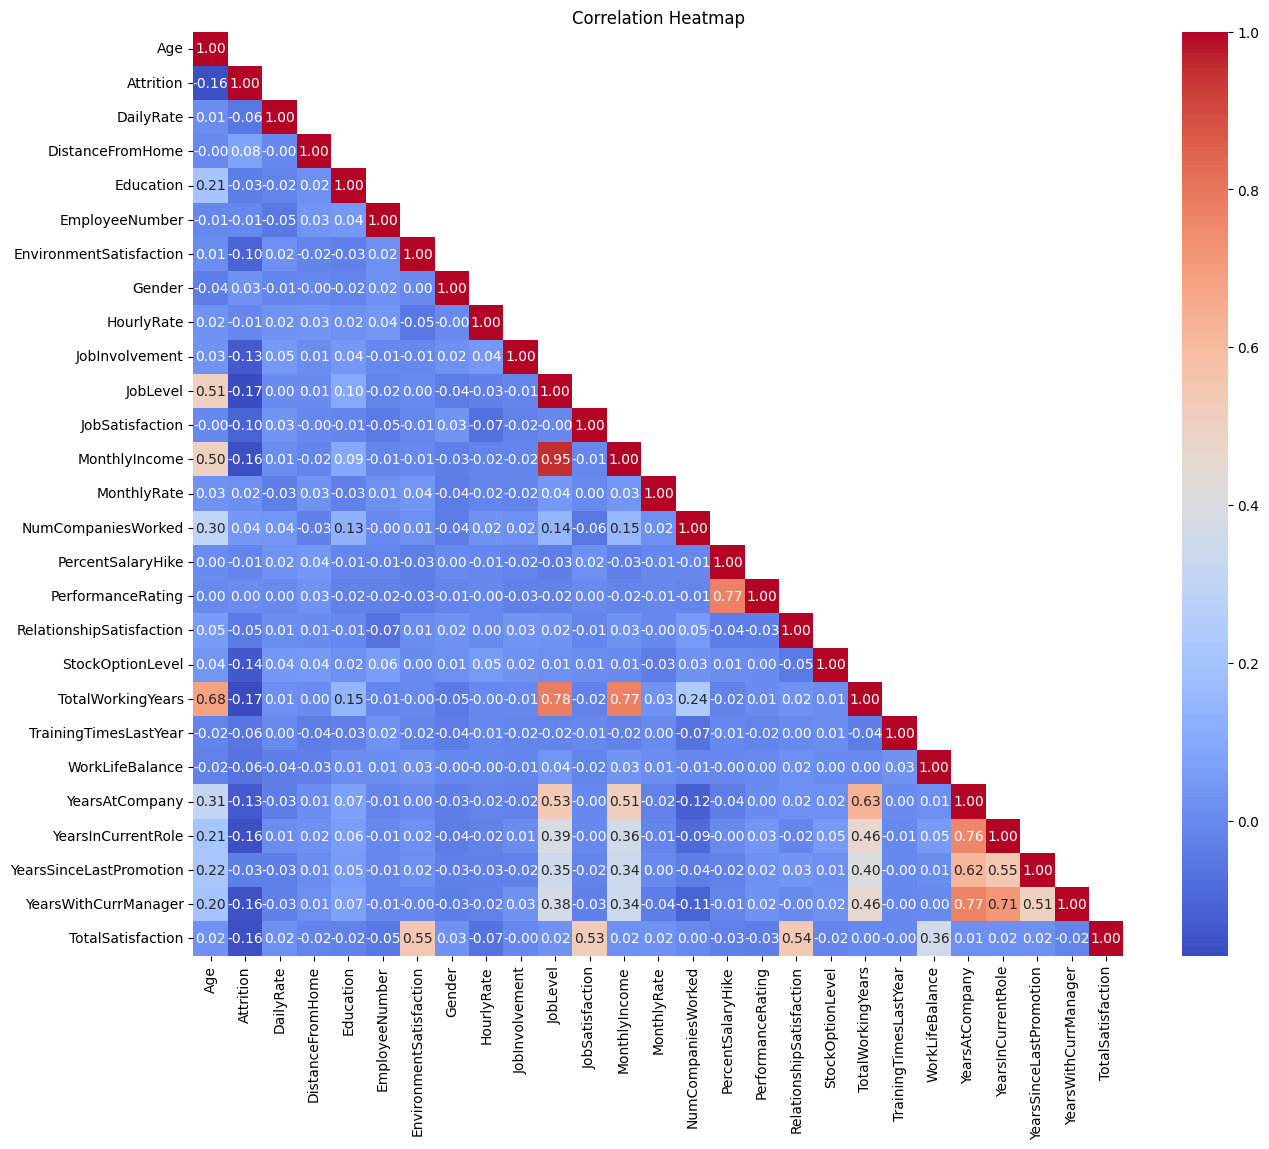

In [50]:
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(df.select_dtypes(include='number').corr(), dtype=bool), k=1)
sns.heatmap(df.select_dtypes(include='number').corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Correlation analysis:**
The correlation analysis following transfomration has not revealed any new linear correlations. We will now progress with hypothesis testing and check if there are any statistically significant relationships between features.


In [51]:
pd.crosstab(df['Attrition'], df['Gender'], normalize='columns')

Gender            0         1
Attrition                    
0          0.852041  0.829932
1          0.147959  0.170068

In [52]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], errors='ignore') #dropping columns that do not add value to the analysis
print(df.shape)
df.head(10)

(1470, 34)


Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   
5   32          0  Travel_Frequently       1005  Research & Development   
6   59          0      Travel_Rarely       1324  Research & Development   
7   30          0      Travel_Rarely       1358  Research & Development   
8   38          0  Travel_Frequently        216  Research & Development   
9   36          0      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   
5                 2          2  Life Sciences               8   
6                 3          3        Medical              10   
7                24          1  Life Sciences              11   
8                23          3  Life Sciences              12   
9                27          3        Medical              13   

   EnvironmentSatisfaction  ...  StockOptionLevel  TotalWorkingYears  \
0                        2  ...                 0                  8   
1                        3  ...                 1                 10   
2                        4  ...                 0                  7   
3                        4  ...                 0                  8   
4                        1  ...                 1                  6   
5                        4  ...                 0                  8   
6                        3  ...                 3                 12   
7                        4  ...                 1                  1   
8                        4  ...                 0                 10   
9                        3  ...                 2                 17   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   
5                      2                2              7                   7   
6                      3                2              1                   0   
7                      2                3              1                   0   
8                      2                3              9                   7   
9                      3                2              7                   7   

  YearsSinceLastPromotion  YearsWithCurrManager  TotalSatisfaction  AgeBracket  
0                       0                     5               2.00       36-45  
1                       1                     7               3.00       46-55  
2                       0                     0               3.00       36-45  
3                       3                     0               3.25       26-35  
4                       2                     2               2.50       26-35  
5                       3                     6               3.25       26-35  
6                       0                     0               1.75       56-65  
7                       0                     0               3.00       26-35  
8                       1                     8           

# Copy dataset

In [53]:
df.to_csv("../data/transformed_data/predict_employee_attrition_transformed.csv", index=False)

---

# Research methodology

Testing hypotheses to determine the relationship between features

**Hypotheses:**

1. Gender impacts attrition

2. Age impacts attrition

3. Department of work impacts attrition

4. Monthly income impacts attrition

5. Total satisfaction level impacts attrition

    5.1 JobSatisfaction impacts attrition

---

# Hypothesis 1: Gender and Attrition

**Null hypothesis:** Gender and attrition rate are independent of each other and do not share a statistically significant relationship.

In [54]:
df["Gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Gender
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [55]:
observed, expected, stats = pg.chi2_independence(data = df, x = "Gender", y = "Attrition")

stats

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.116967  1.0  0.290572  0.027565  0.184514
1        cressie-read  0.666667  1.119705  1.0  0.289982  0.027599  0.184853
2      log-likelihood  0.000000  1.125434  1.0  0.288751  0.027670  0.185560
3       freeman-tukey -0.500000  1.129956  1.0  0.287785  0.027725  0.186119
4  mod-log-likelihood -1.000000  1.134673  1.0  0.286781  0.027783  0.186702
5              neyman -2.000000  1.144708  1.0  0.284660  0.027905  0.187942

**Key observations:** The p-value score is more than 0.05, which means we do not have enough evidence to reject the null hypothesis. In the synthetic dataset, Gender and Attrition do not share a statistically significant relationship.

In [56]:
fig = px.box(
    df,
    x="Gender",
    color="Attrition",
    points="all",
    title="Attrition Count by Gender",
    labels={
        "Gender": "Gender (1=Male, 0=Female)",
        "Attrition": "Attrition (0=No, 1=Yes)",
        },
    color_discrete_map={0: "teal", 1: "orange"},
    width= 1000,
    height= 600  # Change colors here
)
fig.show()

**Key observations:** The boxes in the boxplots overlap and there is absolutely no difference in the median either. The graph helps us validate the test results that Gender and Attrition are not statistically related in the synthetic dataset.

**Business imapct:** While the synthetic dataset doesn't capture the observation, some behavior patterns might impact one gender more than the other gender. The business still needs to closely monitor for signals, however, subtle they maybe to ensure a fair, unbiased workspace. 

**Note:** As the current dataset is biased, we cannot generalize the findings to actual workplace environments. Recommend we tweak the data collection process to ensure that we collect balanced data.

**Note to ML Engineer/Data Scientist:** Dataset is biased as both Gender and Attrition features have imbalanced values. Gender has more male samples and Attrition has more No samples. 

---

# Hypothesis 2: Age and Attrition Rate

**Null hypothesis:** Age and attrition rate are independent of each other and do not share a statistically significant relationship.

In [ ]:
# Hypothesis testing: Chi-square test of independence between AgeBracket and Attrition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the transformed dataset
try:
    df_trans = pd.read_csv('../data/transformed_data/predict_employee_attrition_transformed.csv')
except FileNotFoundError:
    print("Error: The file was not found. Please check the path to your CSV file.")
    # Exit or handle the error appropriately
    df_trans = None

# Create a contingency table
contingency_table = pd.crosstab(df_trans['AgeBracket'], df_trans['Attrition'])
print('Contingency Table:')
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Contingency Table:
Attrition     0    1
AgeBracket          
18-25        79   44
26-35       490  116
36-45       425   43
46-55       200   26
56-65        39    8
Chi-square statistic: 59.4387
p-value: 0.0000
Degrees of freedom: 4
Expected frequencies:
[[103.16938776  19.83061224]
 [508.29795918  97.70204082]
 [392.54693878  75.45306122]
 [189.56326531  36.43673469]
 [ 39.42244898   7.57755102]]


**Key observations:**
* Contingency Table: This table shows the raw counts. For example, in the 18-25 age bracket, 79 employees did not leave (Attrition=0) and 44 did (Attrition=1).
* Chi-square statistic: 59.4387: a measure of how much the observed counts differ from the counts one would expect if there was no relationship at all between age and attrition. A larger value suggests a stronger relationship.
* A p-value of 0.0000 provides enough evidence to reject the null hypothesis. IN the synthetic dataset there is a statistically significant association between an employee's age bracket and their likelihood of attrition.

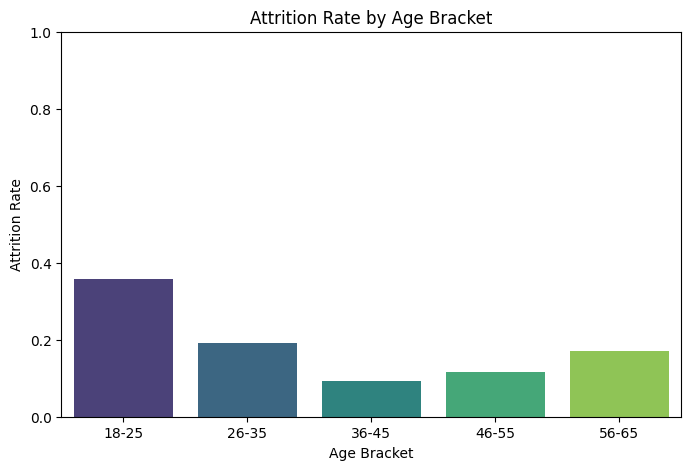

In [ ]:
# Visualization: Attrition rate by AgeBracket
import matplotlib.pyplot as plt
import seaborn as sns

if df_trans is not None:
    # Calculate attrition rate per age bracket
    attrition_rate = df_trans.groupby('AgeBracket')['Attrition'].mean().reset_index()

    # Create the visualization
    plt.figure(figsize=(8,5))
    sns.barplot(x='AgeBracket', y='Attrition', data=attrition_rate, palette='viridis', hue = "AgeBracket")
    plt.title('Attrition Rate by Age Bracket')
    plt.ylabel('Attrition Rate')
    plt.xlabel('Age Bracket')
    plt.ylim(0, 1)
    plt.show()

**Key observations:**
* Attrition Rate: The y-axis shows the proportion of employees in each age bracket who left the company. For example, a rate of 0.4 means 40% of the employees in that group left.
* Key Insight 1: Youngest employees have the highest attrition: The "18-25" age bracket has the highest bar, with an attrition rate of over 35%. This is a very strong signal that the youngest employees are the most likely to leave.
* Key Insight 2: Mid-career stability: The attrition rate drops for the "26-35" group and is lowest for the "36-45" age bracket (at around 10%). This suggests that employees in their late 20s to mid-40s are the most stable.
* Key Insight 3: A slight rise in later careers: The rate begins to creep up again for the "46-55" and "56-65" age brackets, though it never reaches the high levels of the youngest group. This could be due to retirements or late-career changes.

**Business impact:**
- Rejecting the null hypothesis means age is a key factor in attrition.
- HR can use these insights to design age-specific programs, reduce turnover, and optimize workforce planning.

Employees under 26 exhibit the highest attrition rate, with statistical analysis confirming a strong, significant link between age and turnover. This trend poses a risk of losing early-career talent, which can drive up recruitment and training costs while impacting long-term workforce stability. Targeted retention strategies for younger employees could help reduce turnover, preserve institutional knowledge, and improve overall organizational performance.

---

# Hypothesis 3: Department and Attrition Rate

**Null hypothesis:** Department and attrition rate are independent of each other and do not share a statistically significant relationship.

In [59]:
import pandas as pd
import scipy.stats as stats

# Load dataset
file_path = 'predict_employee_attrition_transformed.csv'
df = pd.read_csv('../data/transformed_data/predict_employee_attrition_transformed.csv')

# Create contingency table between Department and Attrition
contingency_table = pd.crosstab(df['Department'], df['Attrition'])

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Display contingency and expected frequency tables
print("\nContingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns))



Chi-square Statistic: 10.79600732241067
Degrees of Freedom: 2
P-value: 0.004525606574479634

Contingency Table:
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Expected Frequencies:
Attrition                        0           1
Department                                    
Human Resources          52.842857   10.157143
Research & Development  806.063265  154.936735
Sales                   374.093878   71.906122


**Key observations:**
* The Chi-square statistic is 10.80 with 2 degrees of freedom.
* The p-value (≈ 0.0045) is below the 0.05 threshold, indicating a statistically significant relationship between department and attrition rate.
* The contingency table shows that Sales has a higher proportion of attrition relative to expected values, while R&D has a slightly lower proportion.
* Human Resources attrition is close to the expected frequency but still contributes to the overall significance.

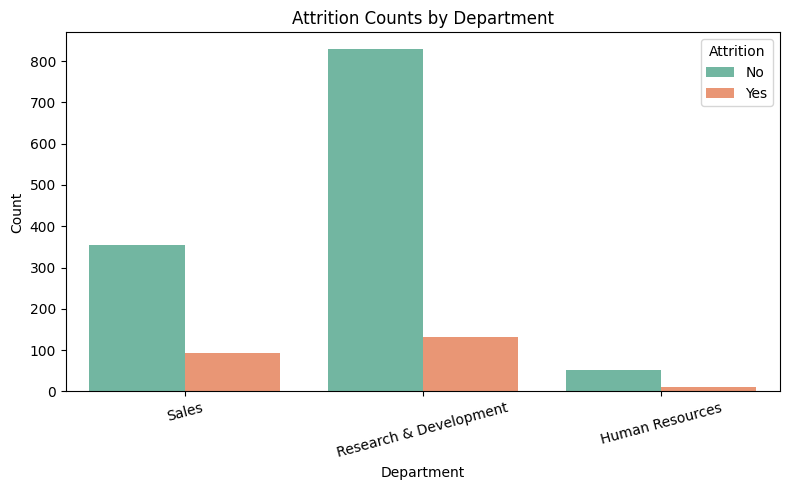

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')

plt.title("Attrition Counts by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Key observations:**
* Research & Development has the highest overall headcount and the largest number of attrition cases in absolute terms, though the attrition proportion appears lower than in Sales.
* Sales shows a noticeably higher proportion of attrition compared to its total department size, indicating potential localized issues.
* Human Resources has the smallest headcount and the fewest attrition cases, but its proportion is still non-negligible given its size. 

**Business impact:**
- Since attrition is significantly related to department, HR should prioritize department-specific retention efforts rather than applying a uniform company-wide strategy.
- Sales, with a higher attrition proportion relative to headcount, may require targeted interventions such as workload review, compensation adjustments, or enhanced career development opportunities.
- For Research & Development, despite having the highest number of attrition cases, the proportion of attrition is comparatively lower. Therefore, retention strategies here could focus on sustaining engagement and career growth to maintain stability.
- The smaller team size in Human Resources means that even a few attrition cases can impact operations. Proactive measures like cross-training and career path planning could mitigate disruption.

---

# Hypothesis 4: Monthly Income and Attrition Rate

**Null hypothesis:** Monthly income and attrition rate are independent of each other and do not share a statistically significant relationship.

In [61]:
pg.mwu(df['MonthlyIncome'], df['Attrition'], alternative='two-sided')

U-val alternative  p-val  RBC  CLES
MWU  2160900.0   two-sided    0.0  1.0   1.0

**Key observations:** 
* The p-value score is 0, which means we have enough evidence to reject the null hypothesis. In the synthetic dataset, MonthlyIncome and Attrition share a statistically significant relationship.

In [62]:
fig = px.box(df, x='Attrition', y='MonthlyIncome', color='Attrition',
             title='Monthly Income vs Attrition',
             labels={'MonthlyIncome': 'Monthly Income', 'Attrition': 'Attrition Status'})
fig.show()

**Key observations:**
* Employees who left the company (Attrition = 1) generally have lower monthly incomes compared to those who stayed (Attrition = 0).
* The boxplot and distribution plots show a clear separation in income levels between the two groups.
* The Mann-Whitney U test result indicates a statistically significant difference in monthly income between employees who left and those who stayed (p-value ≈ 0).
* This suggests that lower monthly income is strongly associated with higher attrition rates.
* Addressing income disparities may help reduce employee attrition and improve retention.

**Business impact:**
* The strong link between lower monthly income and higher attrition rates highlights the importance of competitive compensation strategies.
* Organizations can reduce employee turnover by reviewing and adjusting salary structures, especially for roles with higher attrition.
* Improving pay equity and transparency may enhance employee satisfaction and retention.
* Addressing income disparities can lead to cost savings by reducing recruitment and training expenses associated with high attrition.
* Strategic compensation planning supports a more stable, motivated, and productive workforce.

---

# Hypothesis 5: Total satisfaction level and Attrition

**Null hypothesis:** Satisfaction levels and attrition rate are independent of each other and do not share a statistically significant relationship.

In [63]:
pg.mwu(df["Attrition"], df["TotalSatisfaction"], alternative='two-sided')

U-val alternative  p-val      RBC      CLES
MWU  118.5   two-sided    0.0 -0.99989  0.000055

**Key observations:** A p-value score of 0 provides enough evidence to reject the null hypothesis. In the synthetic dataset, TotalSatisfaction and Attrition share a statistically significant relationship.

In [64]:
# Box plot: TotalSatisfaction by Attrition
fig = px.box(df, x="Attrition", y="TotalSatisfaction", points="all",
             title="Total Satisfaction by Attrition Status",
             labels={"Attrition": "Attrition (0=No, 1=Yes)", "TotalSatisfaction": "Total Satisfaction"},
             color="Attrition",
             color_discrete_map={0: "purple", 1: "yellowgreen"},
             width= 1000,
             height= 600
)
fig.show()

In [65]:
# Box plots: Satisfaction indicators by Attrition
satisfaction_cols = ["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]
for col in satisfaction_cols:
    fig = px.box(df, x="Attrition", y=col, points="all",
                 title=f"{col} by Attrition Status",
                 labels={"Attrition": "Attrition (0=No, 1=Yes)", col: col},
                 color="Attrition",
                  color_discrete_map={0: "mediumseagreen", 1: "orchid"},
                    width= 1000,
                    height= 600)
    fig.show()

**Key observations:** 

1. TotalSatisfaction aggregates JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, and WorkLifeBalance.

2. I have plotted all the features in the second boxplot to understand which feature actually contributes to Attrition from the aggregated TotalSatisfaction feature in the synthetic dataset. 

3. JobSatisfaction and Attrition box plot clearly indicates a difference in Job Satifaction scores between attrited and existing employees. Although, the median is the same, the scores show a higher variance (is distributed more) among existing employees rather than attrited employees. In the synthetic dataset, there is a significant difference between attrited and existing employees when comparing job satisfaction score.

4. EnvironmentSatisfaction and Attrition indicates that the medians are overlapping. Additionally, the attrited employees' environmental satisfaction scores show a tight distribution between 1 and 4. In the synthetic dataset, there is no significant difference between attrited and existing employees when comparing environment satisfaction score.

5. RelationshipSatisfaction and Attrition indicates that the box and the medians are overlapping. In the synthetic dataset, there is no significant difference between attrited and existing employees when comparing relationship satisfaction score.

6. WorkLifeBalance and Attrition too indicates that the box and the medians are overlapping. In the synthetic dataset, there is no significant difference between attrited and existing employees when comparing work-life balance score.

**Business impact:** The synthetic dataset reveals that job satisfaction is closely associated with attrition level. What might also be interesting to focus on is the work-life balance score. Burnout plays a major role in determining an employee's motivation to continue working at an environment. Identifying and adressing this helps improve retention. Here are some measures to improve retention:
1. Rewards and recognition
2. Promotions
3. Adaptive working conditions, such as remote and hybrid work

---

# Hypothesis 5.1: Job Satisfaction and Attrition

**Null hypothesis:** Job satisfaction levels and attrition rate are independent of each other and do not share a statistically significant relationship.

In [66]:
pg.mwu(df["Attrition"], df["JobSatisfaction"], alternative='two-sided')

U-val alternative  p-val       RBC      CLES
MWU  34246.5   two-sided    0.0 -0.968303  0.015848

**Key observations:** A p-value score of 0 provides enough evidence to reject the null hypothesis. In the synthetic dataset, Job satisfaction level and attrition share a statistically significant relationship.

In [67]:
# Box plot: Job satisfaction by Attrition
fig = px.box(df, x="Attrition", y="JobSatisfaction", points="all",
             title="Job Satisfaction by Attrition Status",
             labels={"Attrition": "Attrition (0=No, 1=Yes)", "JobSatisfaction": "Job Satisfaction"},
             color="Attrition",
              color_discrete_map={0: "indigo", 1: "lime"},
              width= 1000,
              height= 600)
fig.show()

**Business impact:** Job satisfaction level impacts attrition in the synthetic dataset. In the real-world, organziations can help improve job satisfaction by adopting the following measures:
1. Clarity and transparency: Explaining the motivation and impact provides a clear vision on how a person's work is impacting the organization. This helps build a sense of achievement at the workplace.
2. Respect: Hear out employee opinions to ensure they feel heard and included. Apart from being respected, this helps them feel one with the organziation.
3. Culture: Build a culture of mutual respect and integrity. For instance, reflect core values in everyday work. This will help build a working culture that's not only motivated but continues motivating others.

---

# Consolidated research results

|Index|Hypotheses|method|p-value|Interpreation|
|-----|----------------|-------------------------|-------------|-------|
|1|Gender and Attrition|Chi-squared|0.2|Accept null|
|2|Age and Attrition|Chi-squared_contingency|0.0|Reject null|
|3| Department and Attrition|Chi-squared|0.0|Reject null|
|4|Monthly income and Attrition|MWU|0.00|Reject null|
|5|Total satisfaction level and Attrition|MWU|0.0|Reject null|
|5.1|JobSatisfaction and Attrition|MWU|0.0|Reject null|

---

# Key findings

Here are the key factors that impact employee attrition in the synthetic dataset.

1. Age 
2. Department of work
3. Montly income levels
4. Job satisfaction levels

**Note:** In the real world, these observations need to be validated before making any changes. Although these features' influence is quite self-explanatory, several factors are at play in an actual workplace. 

We recommend re-running the analysis with an actual dataset to draw conclusive evidence on which factors impact attrition. 

---

# Ethical considerations

We have taken the following steps to ensure the ETL process is ethically sound.

1. As the dataset is synthetic, we have limited the test results to the synthetic dataset.

2. We have flagged data imbalance and bias.

---

# Summary

1. Feature Engineering: Created new features such as TotalSatisfaction (aggregated satisfaction scores) and AgeBracket (age bins) to enhance analysis.

2. Statistical Testing: Applied hypothesis tests (e.g., chi-squared, Mann-Whitney U) to identify significant associations between variables and attrition.

3. Visualization: Used advanced plots (box plots, bar charts) to illustrate findings and support interpretation.

4. Business Insights: Interpreted results to recommend retention strategies and highlight areas for bias mitigation.

5. Results: Age, Department, Monthly income, and Job satisfaction impact attrition in the synthetic dataset.

**Summary credit:** This summary was generated by GitHub Copilot. We edited and added point #5.

---

# Credits

1. We leveraged ChatGPT and GitHub Copilot to quickly get the codes for hypotheses' testing. Our analysis is based on our experience but honed by GitHub Copilot.

2. We also want to attribute the transformation changes. These were recommended by GitHub Copilot.